In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [10]:
X,y = make_blobs(n_samples = 1000 , centers = 3, random_state = 23 , n_features = 2)

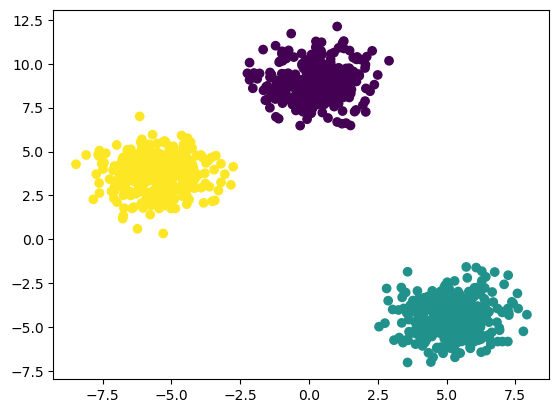

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33 , random_state = 42)

In [13]:
from sklearn.cluster import KMeans

In [14]:
#Elbow method
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[34827.57682552023,
 7935.437286145418,
 1319.2730531585605,
 1140.4677884655127,
 992.1300308656067,
 853.7528135404277,
 757.5478747725865,
 664.759464086673,
 580.121500456372,
 534.410600697293]

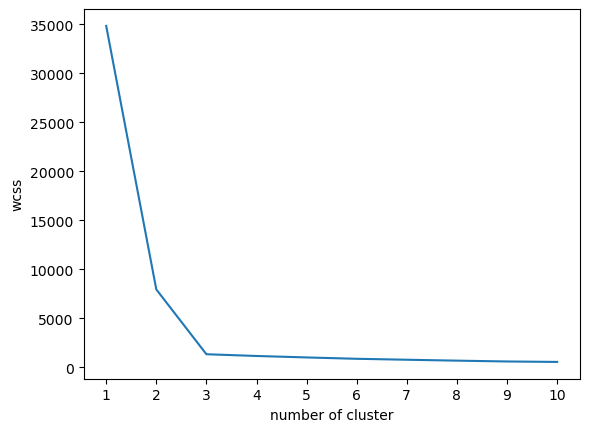

In [17]:
#plot the elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3 , init = "k-means++")

In [19]:
y_labels = kmeans.fit_predict(X_train)

In [20]:
y_labels

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1,
       0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0,
       2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0,

In [21]:
#If we have large dataset we can find k using - 
#knee locator
!pip install kneed

In [22]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11),wcss,curve = 'convex',direction = 'decreasing')

In [23]:
k1.elbow

3

In [24]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficents=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficents.append(score)
    

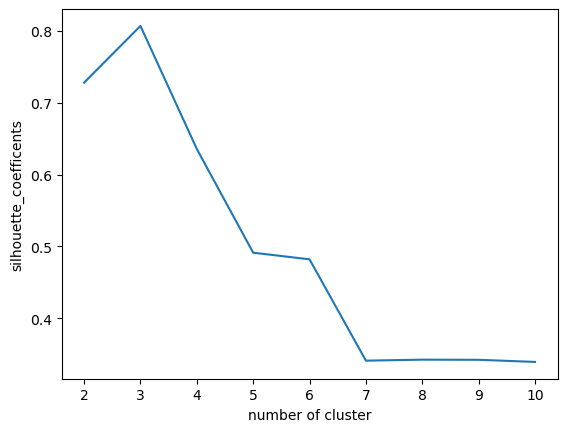

In [27]:
plt.plot(range(2,11),silhouette_coefficents)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("silhouette_coefficents")
plt.show()